<a href="https://colab.research.google.com/github/inchara-kv/Remote_work_data_analysis/blob/main/P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("remote_work_data.csv")
df.head()

Employee_ID  Age      Gender           Job_Role    Industry  \
0     EMP0001   32  Non-binary                 HR  Healthcare   
1     EMP0002   40      Female     Data Scientist          IT   
2     EMP0003   59  Non-binary  Software Engineer   Education   
3     EMP0004   27        Male  Software Engineer     Finance   
4     EMP0005   49        Male              Sales  Consulting   

   Years_of_Experience Work_Location  Hours_Worked_Per_Week  \
0                   13        Hybrid                     47   
1                    3        Remote                     52   
2                   22        Hybrid                     46   
3                   20        Onsite                     32   
4                   32        Onsite                     35   

   Number_of_Virtual_Meetings  Work_Life_Balance_Rating Stress_Level  \
0                           7                         2       Medium   
1                           4                         1       Medium   
2                          11                         5       Medium   
3                           8                         4         High   
4                          12                         2         High   

  Mental_Health_Condition Access_to_Mental_Health_Resources  \
0              Depression                                No   
1                 Anxiety                                No   
2                 Anxiety                                No   
3              Depression                               Yes   
4                     NaN                               Yes   

  Productivity_Change  Social_Isolation_Rating Satisfaction_with_Remote_Work  \
0            Decrease                        1                   Unsatisfied   
1            Increase                        3                     Satisfied   
2           No Change                        4                   Unsatisfied   
3            Increase                        3                   Unsatisfied   
4            Decrease                        3                   Unsatisfied   

   Company_Support_for_Remote_Work Physical_Activity Sleep_Quality  \
0                                1            Weekly          Good   
1                                2            Weekly          Good   
2                                5               NaN          Poor   
3                                3               NaN          Poor   
4                                3            Weekly       Average   

          Region  
0         Europe  
1           Asia  
2  North America  
3         Europe  
4  North America

In [ ]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
df.info()

Shape: (5000, 20)

Columns:
 Index(['Employee_ID', 'Age', 'Gender', 'Job_Role', 'Industry',
       'Years_of_Experience', 'Work_Location', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Work_Life_Balance_Rating',
       'Stress_Level', 'Mental_Health_Condition',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
       'Region'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Employee_ID                        5000 non-null   object
 1   Age                                5000 non-null   int64 
 2   Gender                             5000 non-null   object
 3   Job_Role                        

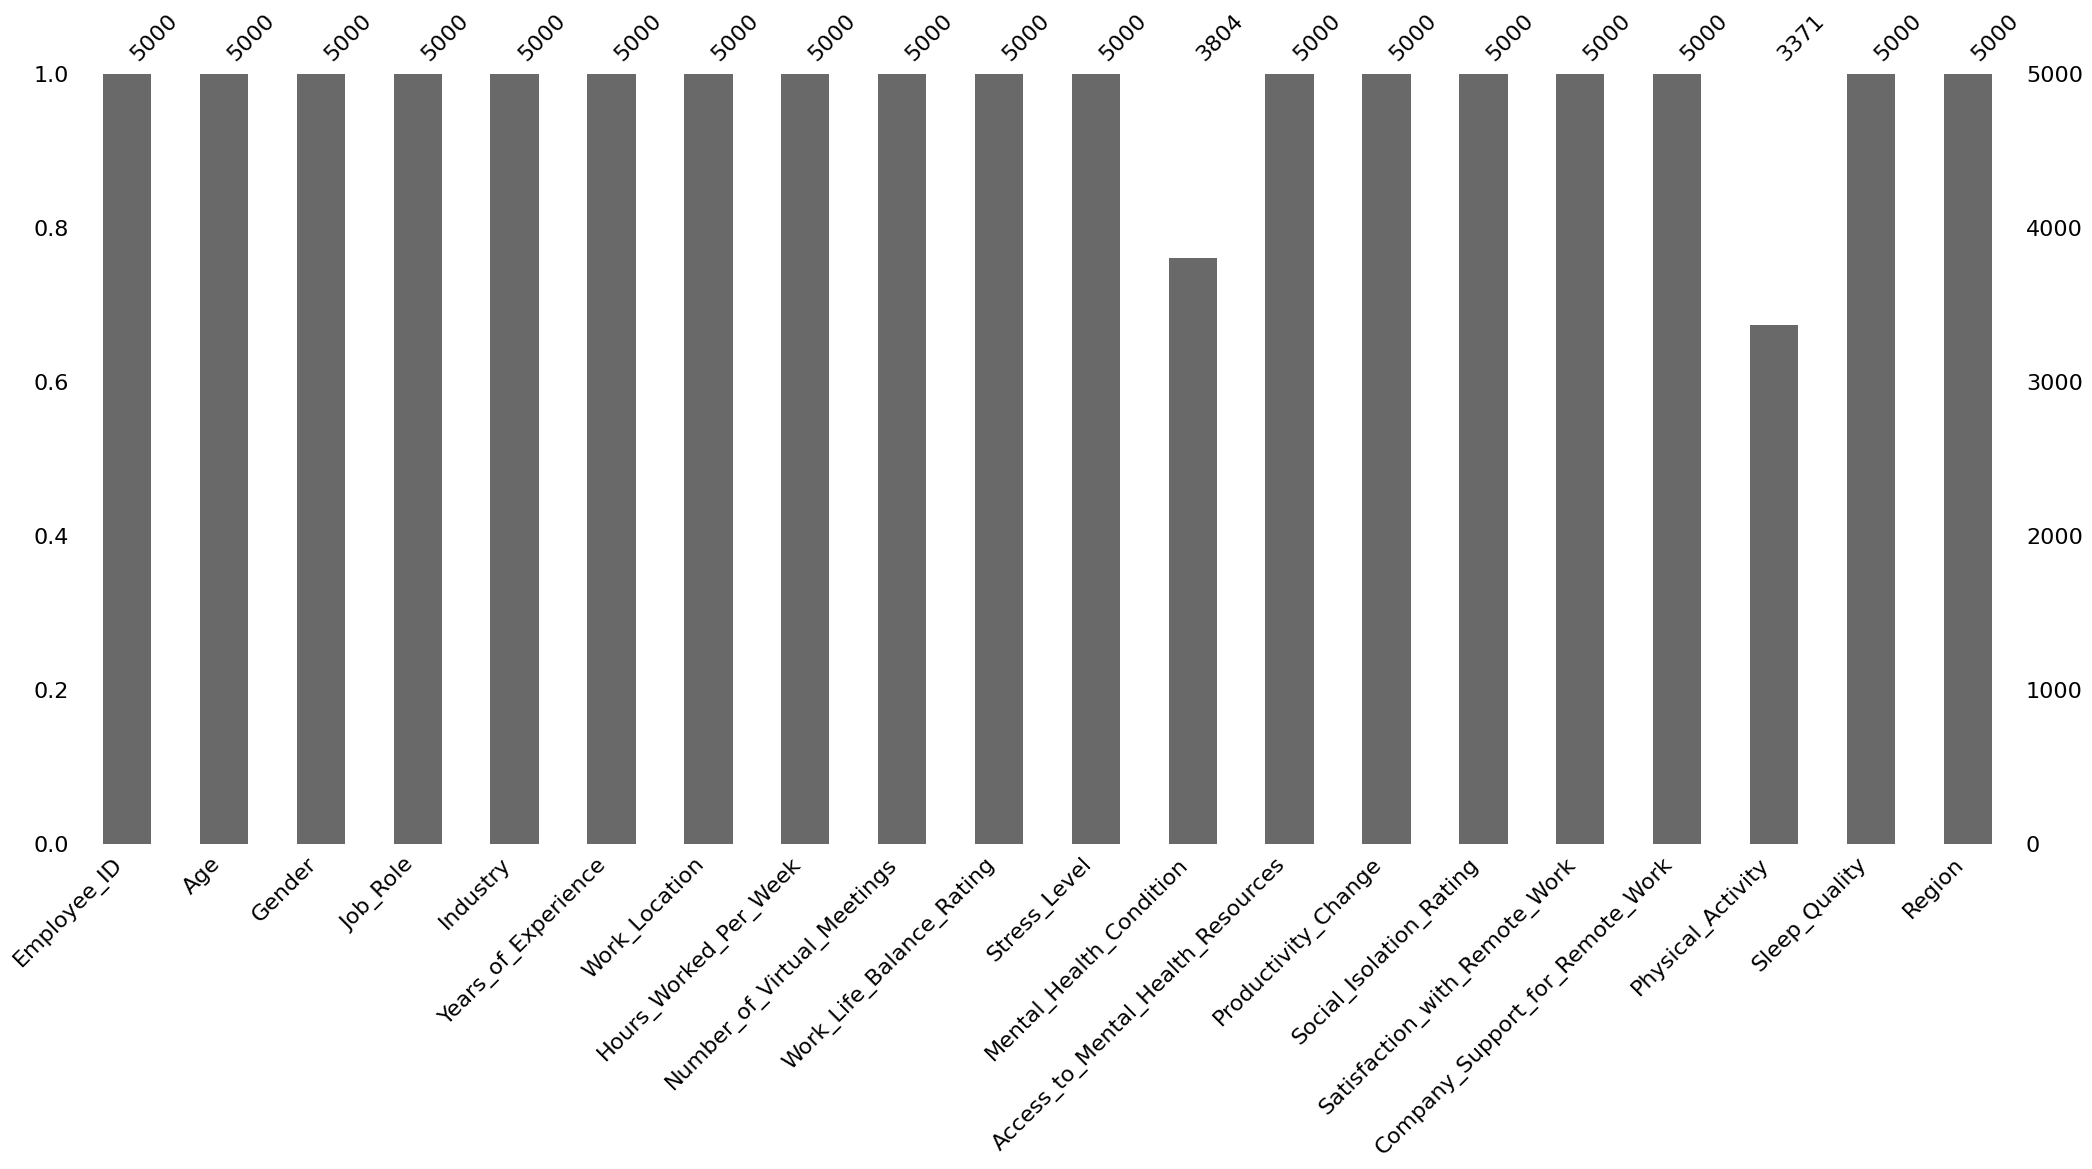

In [ ]:
df.isnull().sum()
msno.bar(df)
plt.show()

In [ ]:
df.fillna(method='ffill', inplace=True)

df.dropna()

In [ ]:
print("Duplicates:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicates: 0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

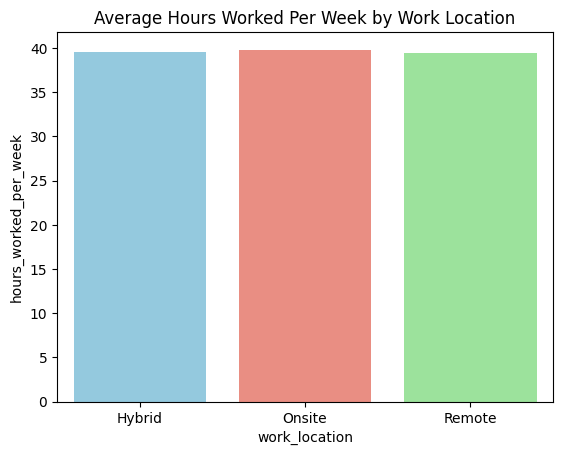

In [ ]:
work_location_colors = {'Hybrid': 'skyblue', 'Remote': 'lightgreen', 'Onsite': 'salmon'}
df_group = df.groupby('work_location')['hours_worked_per_week'].mean().reset_index()
sns.barplot(data=df_group, x='work_location', y='hours_worked_per_week', palette=work_location_colors)
plt.title("Average Hours Worked Per Week by Work Location")
plt.savefig('average_hours_per_week_barplot.png', bbox_inches='tight')
plt.show()

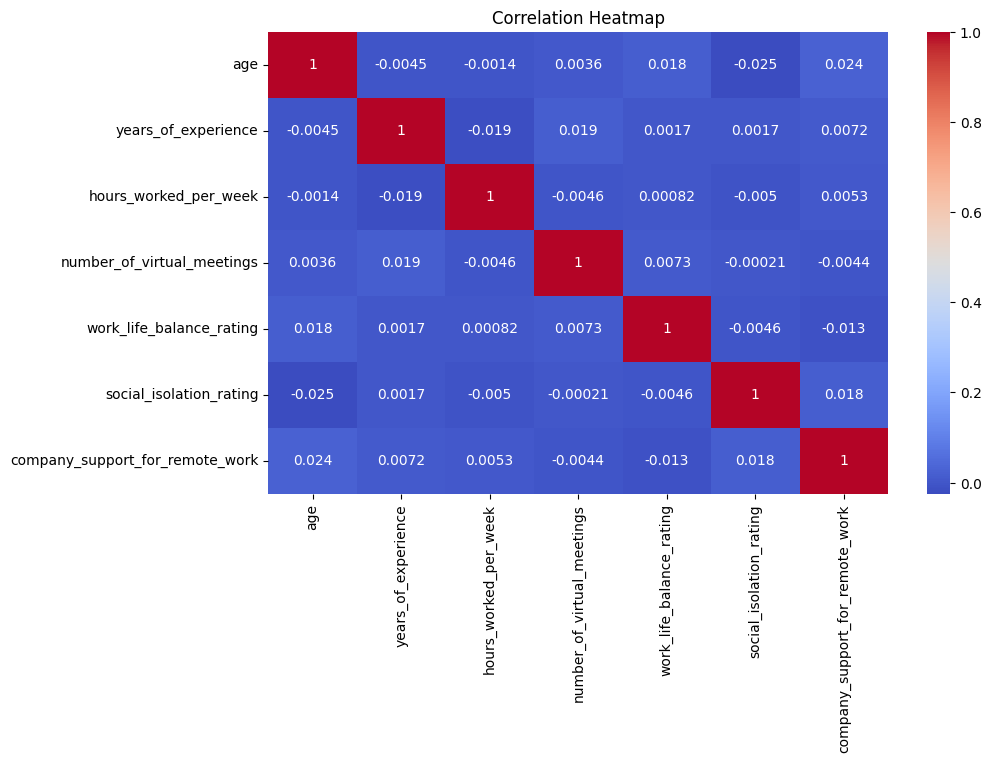

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig('correlation_heatmap.png', bbox_inches='tight')
plt.show()

In [ ]:
fig = px.bar(df['region'].value_counts().head(10),
             labels={'value':'Job Count', 'index':'Region'},
             title='Top Regions for Remote Work')
fig.show()

In [ ]:
work_location_colors = {'Hybrid': 'skyblue', 'Remote': 'lightgreen', 'Onsite': 'salmon'}
fig = px.box(df, x='work_location', y='hours_worked_per_week', color='work_location',
             title='Hours Worked Per Week Comparison by Work Location',
             color_discrete_map=work_location_colors)
fig.show()
fig.write_html("topregions.html")
files.download('topregions.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig.write_html("hours_worked_per_week_boxplot.html")
files.download('hours_worked_per_week_boxplot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
fig = px.scatter(df, x='years_of_experience', y='hours_worked_per_week', color='work_location',
                 title='Years of Experience vs Hours Worked Per Week by Work Location', size='years_of_experience',
                 height=600, width=900)
fig.show()

In [ ]:
fig.write_html("experience_vs_hours.html")
files.download('experience_vs_hours.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Imagine you have a big table of information about employees, including how many years they've worked and how many hours they work each week, and where they work (like Hybrid, Remote, or Onsite).
This piece of code is like telling the computer to:

Take that **employee table**.

Create a visual chart where:

The **horizontal** line (the one going left to right) represents the "Years of Experience" of each employee.
The **vertical** line (the one going up and down) represents the "Hours Worked Per Week" by each employee.
Each employee is shown as a dot on this chart.
The color of each dot tells us where that employee works (Hybrid, Remote, or Onsite).
The size of the dot is also based on their "**Years of Experience**" (bigger dots for more experienced people).
Give this chart a title: "**Years of Experience vs Hours Worked Per Week by Work Location**".
Show you the chart.**bold text**
The Graph:

The scatter plot you see is the result of this code. It shows you all the individual employees as dots.

If a dot is further to the right, it means that employee has more years of experience.

If a dot is higher up, it means that employee works more hours per week.
The color of the dot tells you if they work Hybrid (blue), Remote (green), or Onsite (salmon).
# Summary :

By looking at this chart, we can get an idea of how years of experience and weekly work hours are related, and if that relationship is different for people in Hybrid, Remote, or Onsite work locations.

For example, you can look:

Are the dots scattered all over, or do they seem to form a pattern (like going upwards or staying flat as experience increases)?
Are the **blue** (Hybrid), **green** (Remote), and **salmon** (Onsite) dots mixed together, or do they tend to be in different areas of the chart? This could tell us if certain work locations have employees with more or less experience, or if they tend to work more or fewer hours.

In simple terms, this chart helps us visually explore if having more experience means working more or fewer hours, and if where you work makes a difference in that relationship.

In [ ]:
df.to_csv("cleaned_remote_work_data.csv", index=False)

In [ ]:
!pip install ydata-profiling

from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Remote Work Data Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 20/20 [00:01<00:00, 10.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("remote_work_eda_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from google.colab import files
files.download("remote_work_eda_report.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can download the notebook file (`.ipynb`) and the generated HTML report (`remote_work_eda_report.html`) to your local machine.

In [ ]:
from google.colab import files
files.download('remote_work_eda_report.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('work_location_distribution.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('average_hours_per_week_barplot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('correlation_heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install kaleido